# Trabajo práctico integrador 
## _Aprendizaje de Maquina_
### CEIA Co12

### Alumnos:
- Córdoba, Pablo
- Pérez Millán, Rodrigo

### Dataset:
- [Wine Quality](https://www.kaggle.com/datasets/joebeachcapital/wine-quality)

### Posibles cuestiones a resolver:

***

## 1. Carga de datos

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol


Output variable (based on sensory data):

12 - quality (score between 0 and 10)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATASET_PATH = "./dataset"

In [3]:
#Leo las columnas
cols = pd.read_csv(DATASET_PATH + '/winequality.columns.csv').column.values.tolist()

print("Columnas: ", cols)

#Leo csv de vino rojo
data_red = pd.read_csv(DATASET_PATH + '/winequality-red.csv',
                       delimiter=';',
                       header=0,
                       names = cols
                    )

#Adjunto una columna nueva con el tipo
data_red["type"]="red"

#Leo csv de vino blanco
data_white = pd.read_csv(DATASET_PATH + '/winequality-white.csv',
                       delimiter=';',
                       header=0,
                       names = cols
                    )
#Adjunto una columna nueva con el tipo
data_white["type"]="white"

#Defino el df final de trabajo
df=pd.concat([data_white,data_red],ignore_index=True)

df.info()

Columnas:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-

## 2. Análisis Exploratorio de Datos (EDA)

### 2.1. Descripción general

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
df.loc[:,"type"]

0       white
1       white
2       white
3       white
4       white
        ...  
6492      red
6493      red
6494      red
6495      red
6496      red
Name: type, Length: 6497, dtype: object

### 2.2. Visualizaciones de distribuciones

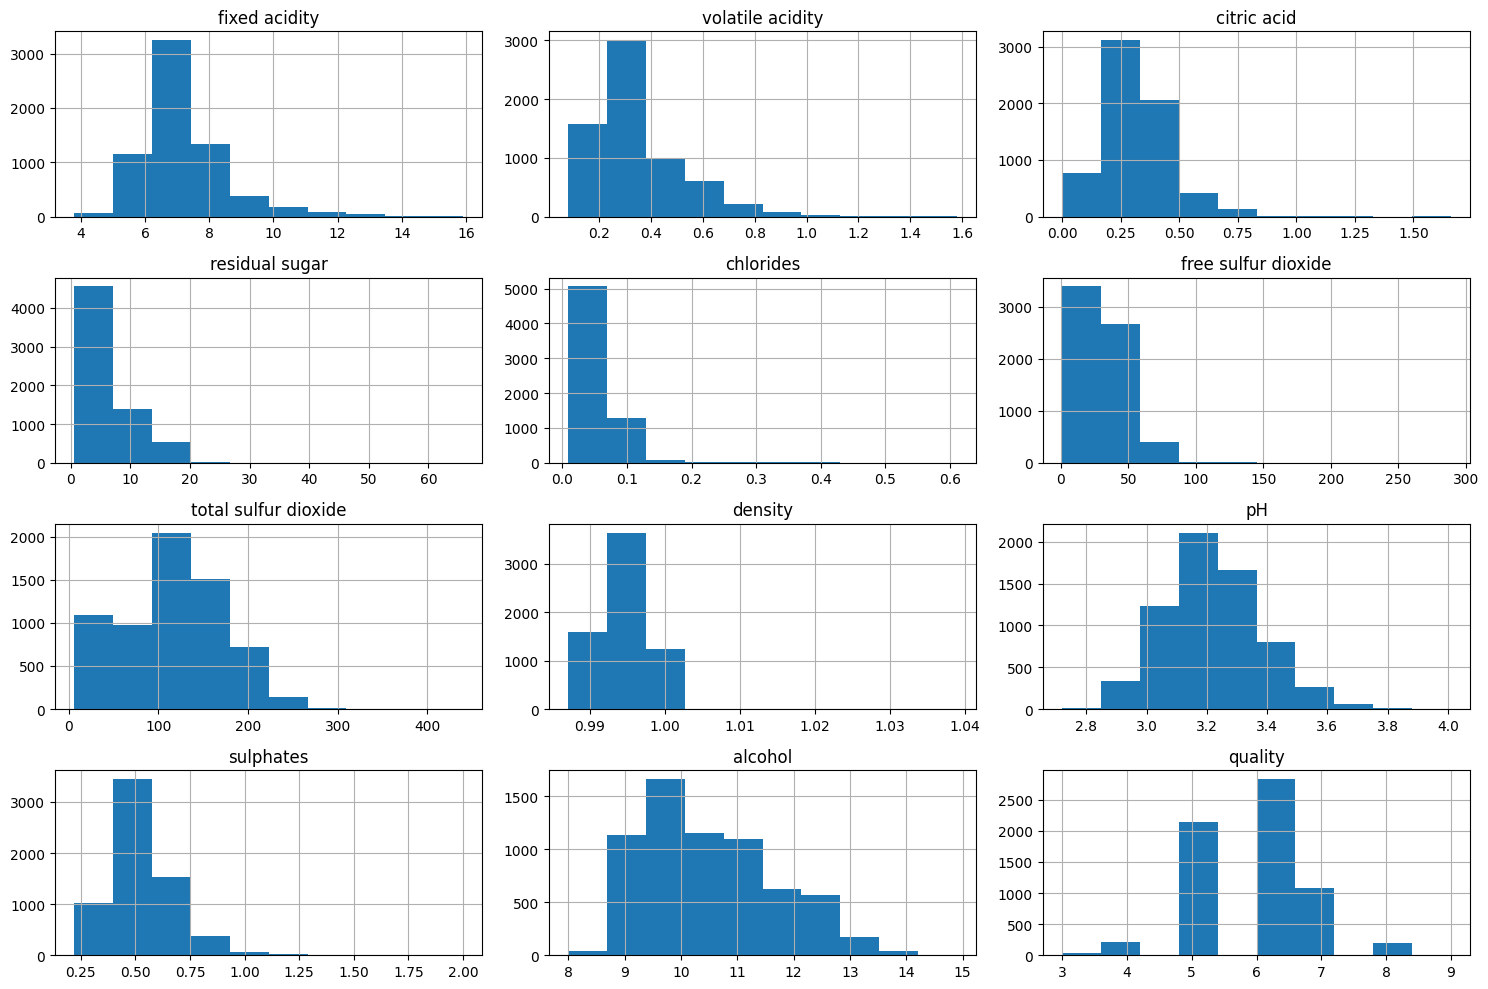

In [7]:
# Histogramas para cada variable
df.hist(figsize=(15, 10))
plt.tight_layout()  # ajusta el espaciado para que no haya superposición
plt.show()

## Histogramas para cada variable
#df.hist(figsize=(12, 12), bins=20)
#plt.tight_layout()  # Ajusta el espaciado para evitar superposición
#plt.show()

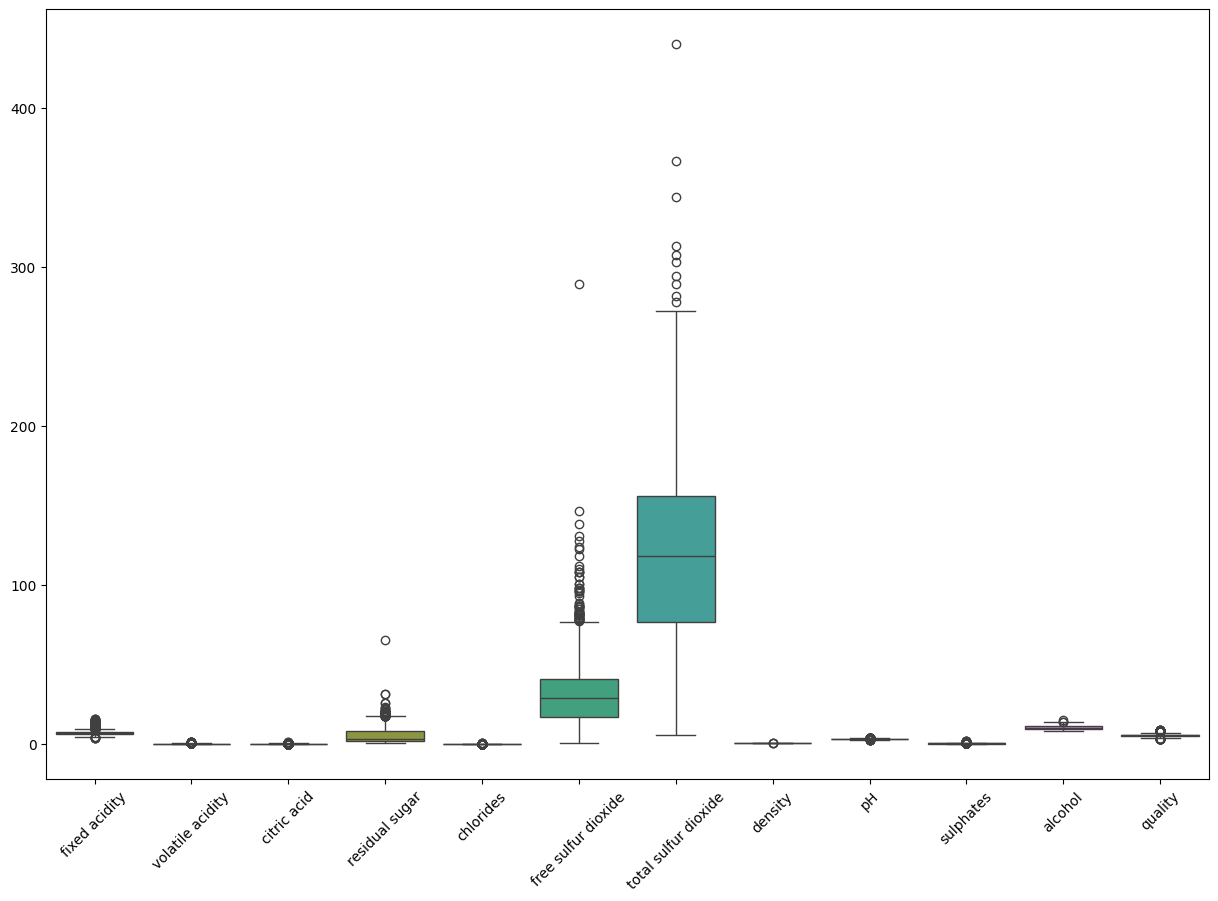

In [8]:
# Boxplots para entender las distribuciones y detectar posibles valores atípicos
plt.figure(figsize=(15,10))
sns.boxplot(data=df.drop('type', axis=1))  # Descartando columna categórica para el boxplot
plt.xticks(rotation=45)
plt.show()

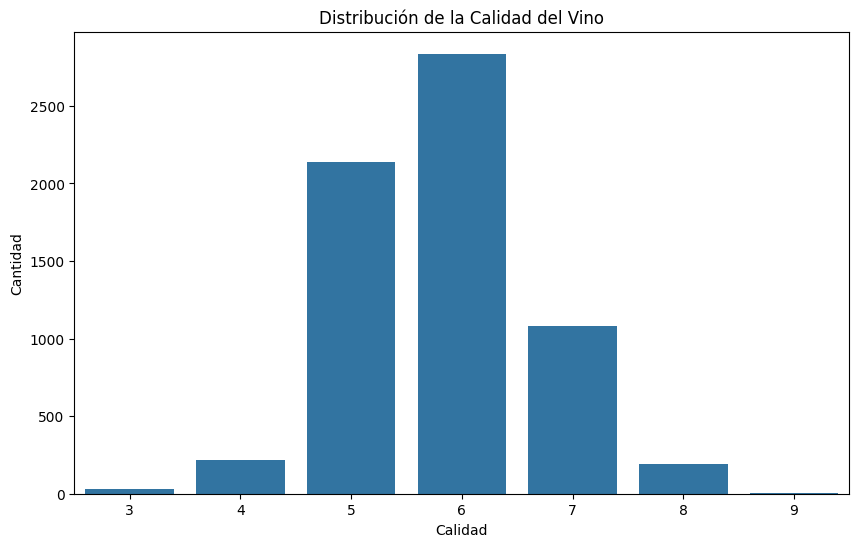

In [9]:
# Visualización de la distribución de la calidad del vino
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df)
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Cantidad')
plt.show()

### 2.3. Matriz de correlación

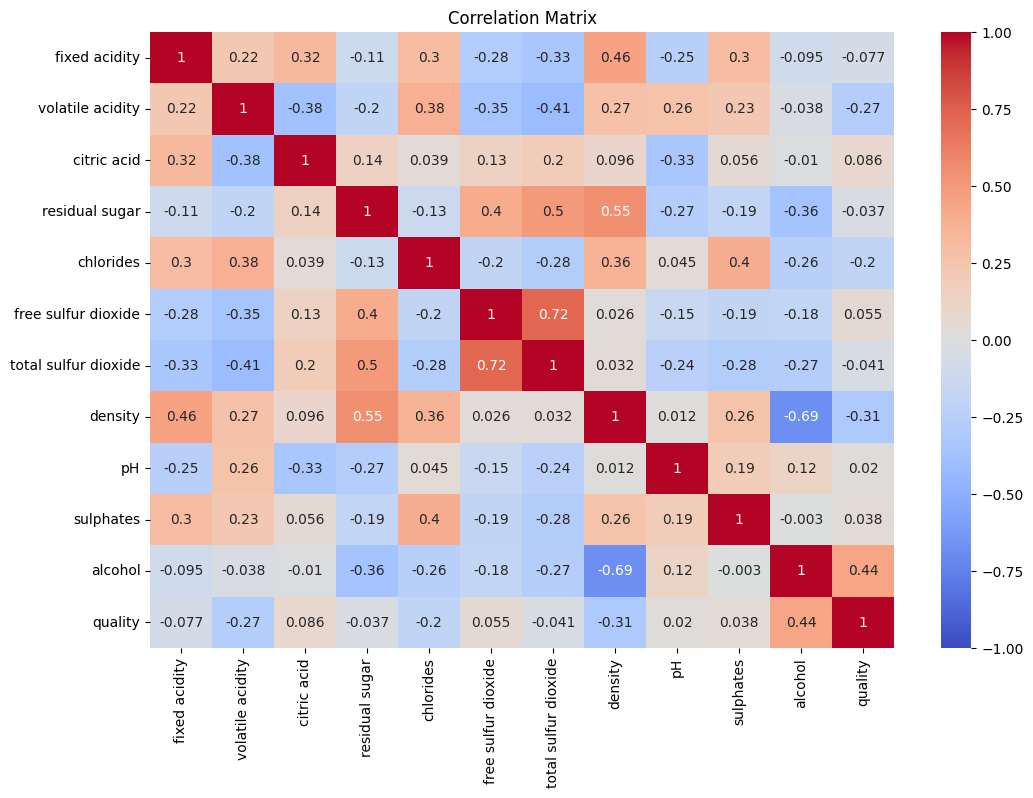

In [10]:
# Se excluye la columna no numérica y calcula la matriz de correlación
numeric_df = df.drop('type', axis=1)
corr_matrix = numeric_df.corr()

# Visualiza la matriz
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### 2.4. Visualización de valores faltantes

In [11]:
# Verificar datos faltantes
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


## 3. Preprocesamiento

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 3.1 Conversión de características categóricas a numéricas

In [13]:
df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)

### 3.2 División de los datos en conjuntos de entrenamiento y prueba

In [14]:
X = df_encoded.drop('quality', axis=1)  # Características
y = df_encoded['quality']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.3 Escalado

In [15]:
scaler = StandardScaler()

# Ajustamos el escalador solo con los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Modelado

### 4.1. Modelo de regresion lineal

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [17]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred = lr_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 0.47
Mean Absolute Error (MAE): 0.55
